<a href="https://colab.research.google.com/github/mrdhridho/galvanize/blob/master/junktoclear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

import math

from subprocess import check_output

In [2]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5
#Source: https://www.kaggle.com/marknagelberg/rmsle-function

In [3]:
print("Loading data...")
df = pd.read_excel("/content/drive/My Drive/junktoclear_data.xls")
df.shape

Loading data...


(11377, 23)

In [4]:
# split train = 90 % & test = 10 %
train, test = train_test_split(df, test_size=0.1)

In [5]:
print(train.shape)
print(test.shape)

(10239, 23)
(1138, 23)


In [6]:
# drop df that quoted_amount < 0
train = train[train.quoted_amount > 0]
test = test[test.quoted_amount > 0]
print(train.shape)
print(test.shape)

(9434, 23)
(1038, 23)


In [7]:
train

,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on
3016,30946,2019-01-28,call in,residential,2019-01-29,13:00:00,2019-01-29 13:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Removal and disposal of 1 x 3 Seater L-Shape S...,60.0,"28th Jan - Job confirmed for Tuesday, 29th Jan...",1,117491,0,0000-00-00 00:00:00
10959,39503,2020-07-21,email,residential,2020-07-22,12:00:00,2020-07-22 12:00:00,NaN,NaN,Landed,Yes,NaN,NaN,no,no,decline,"Removal of 1 x 2 Seater large fabric sofa, 1 x...",850.0,22nd July - Emailed quote.\n21st July - Onsite...,1,417482,0,0000-00-00 00:00:00
6906,35098,2019-10-29,online,residential,2019-10-29,15:00:00,2019-10-29 15:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Disposal Item \n\n1 x Bike\n2 x Single rattan ...,80.0,29/10 - Job for today 3 pm,1,98407,0,0000-00-00 00:00:00
8148,36436,2020-01-13,call in,residential,2020-01-14,13:00:00,2020-01-14 13:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Disposal Item\n\n1 x IKEA parasol to dispose. ...,80.0,13/01 - Job for 14/01 @ 1 pm,1,239106,0,0000-00-00 00:00:00
7470,35690,2019-12-05,call in,residential,2019-12-05,13:00:00,2019-12-05 13:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Removal of 1 x Kind size bed frame with mattre...,280.0,"5th Dec - Job confirmed for Thursday, 5th Dec ...",1,297722,0,0000-00-00 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,36778,2020-02-04,call in,residential,2020-02-05,10:00:00,2020-02-05 10:00:00,NaN,NaN,Office Unit,Yes,NaN,NaN,no,no,job completed,Removal of 2 bookshelves and a rug to dispose....,90.0,"4th Feb - Job confirmed for Wednesday, 5th Feb...",1,79903,0,0000-00-00 00:00:00
3796,31761,2019-03-27,call in,commercial,2019-04-08,10:00:00,2019-04-08 10:00:00,NaN,NaN,Commercial,Yes,NaN,NaN,no,no,job completed,Relocation From \n\nA) 79 ayer rajah cresent #...,300.0,27/3 - Emailed quote $480 . Best price $400.\n...,1,139955,0,0000-00-00 00:00:00
10589,39097,2020-07-06,online,commercial,2020-07-06,09:00:00,2020-07-06 09:00:00,This Week,Morning,Commercial,Yes,NaN,NaN,no,no,decline,Disposal Item\n\nStacked chairs\n\nPrice quote...,700.0,06/07 - Emailed quote,1,NaN,0,0000-00-00 00:00:00
10002,38459,2020-06-08,call in,residential,2020-06-27,10:00:00,2020-06-27 10:00:00,NaN,NaN,Condo,Yes,NaN,NaN,no,no,job completed,Removal of following furniture (Refer to 8 pic...,280.0,"8th June - Job confirmed for Saturday, 27th Ju...",1,259977,0,0000-00-00 00:00:00


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9434 entries, 3016 to 8831
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   enquiry_id            9434 non-null   int64  
 1   enquiry_date          9434 non-null   object 
 2   enquiry_mode          9434 non-null   object 
 3   enquiry_type          9432 non-null   object 
 4   preferred_date        9430 non-null   object 
 5   preferred_time        9430 non-null   object 
 6   preferred_datetime    9430 non-null   object 
 7   preferred_date_range  2388 non-null   object 
 8   preferred_time_range  2304 non-null   object 
 9   removal_item_from     9432 non-null   object 
 10  has_lift              9432 non-null   object 
 11  lift_level            487 non-null    float64
 12  unit_level            489 non-null    float64
 13  is_mounted            9432 non-null   object 
 14  is_bed_bugs           9432 non-null   object 
 15  enquiry_status    

In [9]:
#HANDLE MISSING VALUES
print("Handling missing values...")
def handle_missing(dataset):
    dataset.enquiry_type.fillna(value="missing", inplace=True)
    dataset.removal_item_from.fillna(value="missing", inplace=True)
    dataset.has_lift.fillna(value="missing", inplace=True)
    dataset.is_mounted.fillna(value="missing", inplace=True)
    dataset.is_bed_bugs.fillna(value="missing", inplace=True)
    dataset.customer_postal_code.fillna(value="missing", inplace=True)
    return (dataset)

train = handle_missing(train)
test = handle_missing(test)
print(train.shape)
print(test.shape)

Handling missing values...
(9434, 23)
(1038, 23)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9434 entries, 3016 to 8831
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   enquiry_id            9434 non-null   int64  
 1   enquiry_date          9434 non-null   object 
 2   enquiry_mode          9434 non-null   object 
 3   enquiry_type          9434 non-null   object 
 4   preferred_date        9430 non-null   object 
 5   preferred_time        9430 non-null   object 
 6   preferred_datetime    9430 non-null   object 
 7   preferred_date_range  2388 non-null   object 
 8   preferred_time_range  2304 non-null   object 
 9   removal_item_from     9434 non-null   object 
 10  has_lift              9434 non-null   object 
 11  lift_level            487 non-null    float64
 12  unit_level            489 non-null    float64
 13  is_mounted            9434 non-null   object 
 14  is_bed_bugs           9434 non-null   object 
 15  enquiry_status    

In [11]:
#PROCESS CATEGORICAL DATA
print("Handling categorical variables...")
le = LabelEncoder()

le.fit(np.hstack([train.enquiry_type, test.enquiry_type]))
train.enquiry_type = le.transform(train.enquiry_type)
test.enquiry_type = le.transform(test.enquiry_type)

le.fit(np.hstack([train.removal_item_from, test.removal_item_from]))
train.removal_item_from = le.transform(train.removal_item_from)
test.removal_item_from = le.transform(test.removal_item_from)

le.fit(np.hstack([train.has_lift, test.has_lift]))
train.has_lift = le.transform(train.has_lift)
test.has_lift = le.transform(test.has_lift)

le.fit(np.hstack([train.is_mounted, test.is_mounted]))
train.is_mounted = le.transform(train.is_mounted)
test.is_mounted = le.transform(test.is_mounted)

le.fit(np.hstack([train.is_bed_bugs, test.is_bed_bugs]))
train.is_bed_bugs = le.transform(train.is_bed_bugs)
test.is_bed_bugs = le.transform(test.is_bed_bugs)
del le

train.head(3)

Handling categorical variables...


,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on
3016,30946,2019-01-28,call in,2,2019-01-29,13:00:00,2019-01-29 13:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Removal and disposal of 1 x 3 Seater L-Shape S...,60.0,"28th Jan - Job confirmed for Tuesday, 29th Jan...",1,117491,0,0000-00-00 00:00:00
10959,39503,2020-07-21,email,2,2020-07-22,12:00:00,2020-07-22 12:00:00,NaN,NaN,3,1,NaN,NaN,1,1,decline,"Removal of 1 x 2 Seater large fabric sofa, 1 x...",850.0,22nd July - Emailed quote.\n21st July - Onsite...,1,417482,0,0000-00-00 00:00:00
6906,35098,2019-10-29,online,2,2019-10-29,15:00:00,2019-10-29 15:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Disposal Item \n\n1 x Bike\n2 x Single rattan ...,80.0,29/10 - Job for today 3 pm,1,98407,0,0000-00-00 00:00:00


In [12]:
train

,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on
3016,30946,2019-01-28,call in,2,2019-01-29,13:00:00,2019-01-29 13:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Removal and disposal of 1 x 3 Seater L-Shape S...,60.0,"28th Jan - Job confirmed for Tuesday, 29th Jan...",1,117491,0,0000-00-00 00:00:00
10959,39503,2020-07-21,email,2,2020-07-22,12:00:00,2020-07-22 12:00:00,NaN,NaN,3,1,NaN,NaN,1,1,decline,"Removal of 1 x 2 Seater large fabric sofa, 1 x...",850.0,22nd July - Emailed quote.\n21st July - Onsite...,1,417482,0,0000-00-00 00:00:00
6906,35098,2019-10-29,online,2,2019-10-29,15:00:00,2019-10-29 15:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Disposal Item \n\n1 x Bike\n2 x Single rattan ...,80.0,29/10 - Job for today 3 pm,1,98407,0,0000-00-00 00:00:00
8148,36436,2020-01-13,call in,2,2020-01-14,13:00:00,2020-01-14 13:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Disposal Item\n\n1 x IKEA parasol to dispose. ...,80.0,13/01 - Job for 14/01 @ 1 pm,1,239106,0,0000-00-00 00:00:00
7470,35690,2019-12-05,call in,2,2019-12-05,13:00:00,2019-12-05 13:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Removal of 1 x Kind size bed frame with mattre...,280.0,"5th Dec - Job confirmed for Thursday, 5th Dec ...",1,297722,0,0000-00-00 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,36778,2020-02-04,call in,2,2020-02-05,10:00:00,2020-02-05 10:00:00,NaN,NaN,4,1,NaN,NaN,1,1,job completed,Removal of 2 bookshelves and a rug to dispose....,90.0,"4th Feb - Job confirmed for Wednesday, 5th Feb...",1,79903,0,0000-00-00 00:00:00
3796,31761,2019-03-27,call in,0,2019-04-08,10:00:00,2019-04-08 10:00:00,NaN,NaN,0,1,NaN,NaN,1,1,job completed,Relocation From \n\nA) 79 ayer rajah cresent #...,300.0,27/3 - Emailed quote $480 . Best price $400.\n...,1,139955,0,0000-00-00 00:00:00
10589,39097,2020-07-06,online,0,2020-07-06,09:00:00,2020-07-06 09:00:00,This Week,Morning,0,1,NaN,NaN,1,1,decline,Disposal Item\n\nStacked chairs\n\nPrice quote...,700.0,06/07 - Emailed quote,1,missing,0,0000-00-00 00:00:00
10002,38459,2020-06-08,call in,2,2020-06-27,10:00:00,2020-06-27 10:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Removal of following furniture (Refer to 8 pic...,280.0,"8th June - Job confirmed for Saturday, 27th Ju...",1,259977,0,0000-00-00 00:00:00


In [13]:
test

,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on
2505,30405,2019-01-02,online,2,2019-01-22,11:00:00,2019-01-22 11:00:00,NaN,NaN,3,1,NaN,NaN,1,1,decline,Disposal of 4 table & 2 stools as per 5 photo ...,170.0,NaN,1,missing,0,0000-00-00 00:00:00
1743,29607,2018-11-21,online,2,2018-11-26,13:00:00,2018-11-26 13:00:00,Within a Specified P,Afternoon,1,1,NaN,NaN,1,1,decline,Disposal Item\n\n1 x 5 seater corner sofa set\...,400.0,21/11 - Customer will revert,1,missing,0,0000-00-00 00:00:00
8914,37253,2020-03-03,call in,2,2020-03-03,14:00:00,2020-03-03 14:00:00,NaN,NaN,2,1,NaN,NaN,1,1,job completed,Disposal Item\n\n1 x Single wooden bed frame w...,190.0,03/03 - Job for Today 2 pm,1,760786,0,0000-00-00 00:00:00
4354,32374,2019-05-07,online,2,2019-05-10,12:00:00,2019-05-10 12:00:00,NaN,NaN,1,1,NaN,NaN,1,1,decline,"Removal of 2 x Office chairs, 1 x Long cabinet...",150.0,7th May - Customer is not answering the phone.,1,329552,0,0000-00-00 00:00:00
8848,37183,2020-02-27,online,2,2020-02-28,10:00:00,2020-02-28 10:00:00,NaN,NaN,5,1,NaN,NaN,1,1,job completed,Disposal Item\n\n1 x Dryer\n\nGround floor clu...,60.0,27/02 - Job for today 9.30am,1,257749,0,0000-00-00 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,33452,2019-07-08,online,2,2019-07-11,13:00:00,2019-07-11 13:00:00,This Week,Morning,1,1,NaN,NaN,1,1,job completed,Disposal Item\n\n2 x 2 Sester Sofa size (220 x...,250.0,08/07 - Emailed quoted . Job for 11/07 @ 1pm,1,266216,0,0000-00-00 00:00:00
4121,32113,2019-04-19,online,2,2019-04-23,14:00:00,2019-04-23 14:00:00,NaN,NaN,3,1,NaN,NaN,1,1,job completed,Disposal Item\n\n1 x Bench\n1 x Sofa bed\n1 x ...,150.0,20/04 - Job for 23/04 2 pm,1,139464,0,0000-00-00 00:00:00
2982,30909,2019-01-26,online,2,2019-02-02,13:00:00,2019-02-02 13:00:00,NaN,NaN,3,1,NaN,NaN,1,1,job completed,Disposal Item\n\n1 x Single recliner chair (3r...,110.0,28/01 - Call customer 11.05 no answering. send...,1,548552,0,0000-00-00 00:00:00
3795,31760,2019-03-27,online,2,2019-04-20,10:00:00,2019-04-20 10:00:00,On a Specific Date,Morning,1,1,NaN,NaN,1,1,job completed,Disposal Item\n\n1 x 3 Seater L-shaped sofa \n...,180.0,27/3 - Emailed quote $170 . After 5 % is $160 ...,1,648360,0,0000-00-00 00:00:00


In [34]:
#PROCESS TEXT: RAW
print("Text to seq process...")
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.enquiry_details.str.lower()])

print("   Fitting tokenizer...")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
print("   Transforming text to seq...")

train["seq_enquiry_details"] = tok_raw.texts_to_sequences(train.enquiry_details.str.lower())
test["seq_enquiry_details"] = tok_raw.texts_to_sequences(test.enquiry_details.str.lower())
train.head(3)

Text to seq process...
   Fitting tokenizer...
   Transforming text to seq...


,enquiry_id,enquiry_date,enquiry_mode,enquiry_type,preferred_date,preferred_time,preferred_datetime,preferred_date_range,preferred_time_range,removal_item_from,has_lift,lift_level,unit_level,is_mounted,is_bed_bugs,enquiry_status,enquiry_details,quoted_amount,remark,is_viewed,customer_postal_code,delete_status,deleted_on,seq_enquiry_details,target
3016,30946,2019-01-28,call in,2,2019-01-29,13:00:00,2019-01-29 13:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Removal and disposal of 1 x 3 Seater L-Shape S...,60.0,"28th Jan - Job confirmed for Tuesday, 29th Jan...",1,117491,0,0000-00-00 00:00:00,"[6, 7, 3, 4, 2, 1, 16, 25, 76, 100, 24, 29, 22...",-0.575219
10959,39503,2020-07-21,email,2,2020-07-22,12:00:00,2020-07-22 12:00:00,NaN,NaN,3,1,NaN,NaN,1,1,decline,"Removal of 1 x 2 Seater large fabric sofa, 1 x...",850.0,22nd July - Emailed quote.\n21st July - Onsite...,1,417482,0,0000-00-00 00:00:00,"[6, 4, 2, 1, 8, 25, 196, 734, 24, 2, 1, 41, 11...",0.078336
6906,35098,2019-10-29,online,2,2019-10-29,15:00:00,2019-10-29 15:00:00,NaN,NaN,1,1,NaN,NaN,1,1,job completed,Disposal Item \n\n1 x Bike\n2 x Single rattan ...,80.0,29/10 - Job for today 3 pm,1,98407,0,0000-00-00 00:00:00,"[3, 5, 2, 1, 436, 8, 1, 32, 200, 39, 2, 101, 4...",-0.504899


In [35]:
#SEQUENCES VARIABLES ANALYSIS
max_seq_enquiry_details = np.max([np.max(train.seq_enquiry_details.apply(lambda x: len(x)))
                                   , np.max(test.seq_enquiry_details.apply(lambda x: len(x)))])
print("max enquiry_details "+str(max_seq_enquiry_details))

max enquiry_details 559


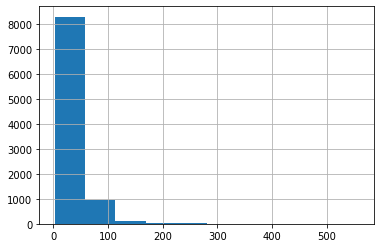

In [36]:
train.seq_enquiry_details.apply(lambda x: len(x)).hist()

In [37]:
#EMBEDDINGS MAX VALUE
#Base on the histograms, we select the next lengths
MAX_enquiry_details = 100
MAX_TEXT = len(tok_raw.word_index) + 1
#MAX_TEXT = np.max([np.max(train.seq_enquiry_details.max())
#                  , np.max(test.seq_enquiry_details.max())])+1
MAX_enquiry_type = np.max([train.enquiry_type.max(), test.enquiry_type.max()])+1
MAX_removal_item_from = np.max([train.removal_item_from.max(), test.removal_item_from.max()])+1
MAX_has_lift = np.max([train.has_lift.max(), test.has_lift.max()])+1
MAX_is_mounted = np.max([train.is_mounted.max(), test.is_mounted.max()])+1
MAX_is_bed_bugs = np.max([train.is_bed_bugs.max(), test.is_bed_bugs.max()])+1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc503f09c18>]],
      dtype=object)

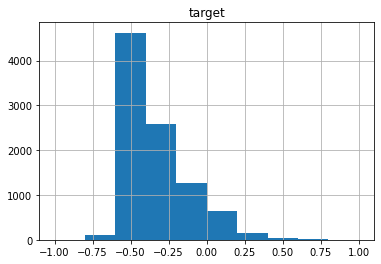

In [38]:
#SCALE target variable
train["target"] = np.log(train.quoted_amount+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train["target"] = target_scaler.fit_transform(train.target.values.reshape(-1,1))
pd.DataFrame(train.target).hist()

In [39]:
#EXTRACT DEVELOPTMENT TEST
dtrain, dvalid = train_test_split(train, random_state=123, train_size=0.99)
print(dtrain.shape)
print(dvalid.shape)

(9339, 25)
(95, 25)


In [40]:
#KERAS DATA DEFINITION
from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {
        'enquiry_details': pad_sequences(dataset.seq_enquiry_details, maxlen=MAX_enquiry_details)
        ,'enquiry_type': np.array(dataset.enquiry_type)
        ,'removal_item_from': np.array(dataset.removal_item_from)
        ,'has_lift': np.array(dataset.has_lift)
        ,'is_mounted': np.array(dataset.is_mounted)
        ,'is_bed_bugs': np.array(dataset.is_bed_bugs)
    }
    return X

X_train = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test)

In [41]:
#KERAS MODEL DEFINITION
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

def get_model():
    #params
    dr_r = 0.1
    
    #Inputs
    enquiry_details = Input(shape=[X_train["enquiry_details"].shape[1]], name="enquiry_details")
    enquiry_type = Input(shape=[1], name="enquiry_type")
    removal_item_from = Input(shape=[1], name="removal_item_from")
    has_lift = Input(shape=[1], name="has_lift")
    is_mounted = Input(shape=[1], name="is_mounted")
    is_bed_bugs = Input(shape=[1], name="is_bed_bugs")
    
    #Embeddings layers
    emb_enquiry_details = Embedding(MAX_TEXT, 100)(enquiry_details)
    emb_enquiry_type = Embedding(MAX_enquiry_type, 10)(enquiry_type)
    emb_removal_item_from = Embedding(MAX_removal_item_from, 10)(removal_item_from)
    emb_has_lift = Embedding(MAX_has_lift, 5)(has_lift)
    emb_is_mounted = Embedding(MAX_is_mounted, 5)(is_mounted)
    emb_is_bed_bugs = Embedding(MAX_is_bed_bugs, 5)(is_bed_bugs)
    
    #rnn layer
    rnn_layer1 = GRU(16) (emb_enquiry_details)
    
    #main layer
    main_l = concatenate([
        Flatten() (emb_enquiry_type)
        , Flatten() (emb_removal_item_from)
        , Flatten() (emb_has_lift)
        , Flatten() (emb_is_mounted)
        , Flatten() (emb_is_bed_bugs)
        , rnn_layer1   

    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    #output
    output = Dense(1, activation="linear") (main_l)
    
    #model
    model = Model([enquiry_details, enquiry_type, removal_item_from
                   , has_lift, is_mounted, is_bed_bugs], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])
    
    return model

    
model = get_model()
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
enquiry_type (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
removal_item_from (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
has_lift (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
is_mounted (InputLayer)         [(None, 1)]          0                                            
_______________________________________________________________________________________

In [42]:
#FITTING THE MODEL
BATCH_SIZE = 20000
epochs = 5

model = get_model()
model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_valid, dvalid.target)
          , verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 620ms/step - loss: 0.1673 - mae: 0.3751 - rmsle_cust: 0.0307 - val_loss: 0.1330 - val_mae: 0.3273 - val_rmsle_cust: 0.0145
Epoch 2/5
1/1 [==============================] - 0s 55ms/step - loss: 0.1276 - mae: 0.3249 - rmsle_cust: 0.0112 - val_loss: 0.1012 - val_mae: 0.2878 - val_rmsle_cust: 0.0144
Epoch 3/5
1/1 [==============================] - 0s 39ms/step - loss: 0.0945 - mae: 0.2768 - rmsle_cust: 0.0109 - val_loss: 0.0762 - val_mae: 0.2505 - val_rmsle_cust: 0.0144
Epoch 4/5
1/1 [==============================] - 0s 46ms/step - loss: 0.0685 - mae: 0.2325 - rmsle_cust: 0.0109 - val_loss: 0.0585 - val_mae: 0.2175 - val_rmsle_cust: 0.0144
Epoch 5/5
1/1 [==============================] - 0s 59ms/step - loss: 0.0500 - mae: 0.1933 - rmsle_cust: 0.0109 - val_loss: 0.0492 - val_mae: 0.1901 - val_rmsle_cust: 0.0144


In [43]:

#EVLUEATE THE MODEL ON DEV TEST: What is it doing?
val_preds = model.predict(X_valid)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

#mean_absolute_error, mean_squared_log_error
y_true = np.array(dvalid.quoted_amount.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
print(" RMSLE error on dev test: "+str(v_rmsle))

 RMSLE error on dev test: 0.8958754978087649


In [44]:
#CREATE PREDICTIONS
preds = model.predict(X_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds)-1

submission = test[["enquiry_id"]]
submission["quoted_amount"] = preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


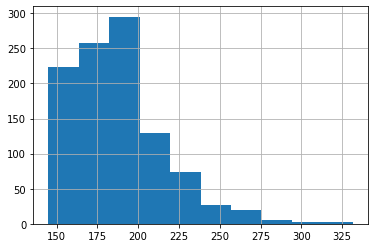

In [45]:
submission.to_excel("/content/drive/My Drive/myNNsubmission.xls", index=False)
submission.quoted_amount.hist()

In [47]:
t = pd.read_excel("/content/drive/My Drive/myNNsubmission.xls")
t

,enquiry_id,quoted_amount
0,30405,185.270874
1,29607,179.689697
2,37253,194.266251
3,32374,207.867996
4,37183,187.928253
...,...,...
1033,33452,156.522446
1034,32113,188.008987
1035,30909,199.288712
1036,31760,156.396301
